# 데이터 정제

## 7-1 결치(빠진 데이터 찾아 정제)

## Lab 1 : 결측치 찾기

In [223]:
import numpy as np
import pandas as pd

In [224]:
# Nan : Not a Number 숫자 형태의 누락된 데이터
df = pd.DataFrame({"sex" : ['M', 'F', np.nan, 'M', 'F'],
                  'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [225]:
df['score'] + 1 # 모든 score 값에 +1을 한다. 결측치는 값이 안더해짐

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [226]:
pd.isna(df) # True 결측치 표시 .isna 메소드 결측치 확인  True = 1 False = 0

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [227]:
pd.isna(df).sum() # 결측치 개수 표시 그래서 sum을하면 개수를 알수 있음

sex      1
score    1
dtype: int64

In [228]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4 non-null      object 
 1   score   4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [229]:
pd.isna(df)['score'].sum() # score 결측치 개수

1

## Lab 2 : 결측치 제거

In [230]:
# 앞의 연산 결과가 반영되지 않음
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [231]:
df.dropna(subset = ['score']) # score 변수에서 결측치가 있는 행을 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [232]:
df # 위에거 결측제거가반영되지 않음 

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [233]:
df_nomiss = df.dropna(subset = ['score']) # 반영 시키려면 변수에 담기
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [234]:
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [235]:
df_nomiss = df.dropna(subset = ['sex', 'score']) # 변수 sex, score 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [236]:
df_nomiss['score'] + 1

0    6.0
1    5.0
3    5.0
Name: score, dtype: float64

In [237]:
df_nomiss2 = df.dropna() # 결측치가 하나라도 있으면 모두 제거
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


## Lab 3 : 결측치 제거하기

In [238]:
exam = pd.read_csv('exam.csv')

In [239]:
exam.loc[[2, 7, 14], ['math']] = np.nan # 인덱스 2, 7, 14에 해당하는 math 컬럼 값에 NaN 값으로 변경
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [240]:
exam['math'].mean()

55.23529411764706

In [241]:
exam['math'] = exam['math'].fillna(55) # 결측치 값에 평균값 55로 넣기

In [242]:
exam.head()

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65


In [243]:
exam['math'].isna().sum()

0

## Lab 4 : 혼자서 해보기 (mpg 데이터 분석)

In [244]:
mpg = pd.read_csv('mpg.csv')

In [245]:
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan # 인덱스 값 [64, 123, 130, 152, 211]의 고속도로 연비 hwy를 결측치로 만들기

In [246]:
mpg.iloc[64:66] # 인덱스 64, 65의 데이터를 출력해서 NaN 값 확인

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12.0,e,pickup


In [247]:
mpg.iloc[123:125]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,NaN,r,suv
124,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20.0,r,suv


In [248]:
mpg[['drv', 'hwy']].isna().sum() # 결측치 몇개인지 확인 우리가 위에 hwy에 결측치 값 5개 넣음

drv    0
hwy    5
dtype: int64

In [249]:
mpg.dropna(subset = ['hwy']).isna().sum() # 변수 hwy 값에 결측치가 몇개인지 확인

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [250]:
# 변수 hwy 변수 값에 결측치를 제거하고, 어떤 구동 방식(drv)의 hwy 평균 연비가 높은지???

mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


## Lab 5 : 이상치 정제하기(이상한 데이터 찾아 정제)

In [251]:
# 이상치를 갖는 데이터 만들기
# sex (남자 - 1, 여자 - 2)
# score (1점 ~ 5점) 5점 척도로 분류
# 이상치 : sex - 3, score - 6 
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                  'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [252]:
df['sex'].value_counts().sort_index() # sex 값의 집단별 빈도수 확인 남자 1 여자 2 값 3이 존재

1    3
2    2
3    1
Name: sex, dtype: int64

In [253]:
df['score'].value_counts().sort_index() # score 값의 집단별 빈도수 확인

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [254]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex']) # sex 인덱스 값이 3이면 결측치로 만든다.
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [255]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score']) # score에 5이상 값만 결측치로 만들기
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [256]:
df.dropna(subset = ['sex', 'score'])\
    .groupby('sex')\
    .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


## Lab 6 : 이상치 제거하기 - 극단적인 값

In [257]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [258]:
import seaborn as sns

<AxesSubplot:ylabel='hwy'>

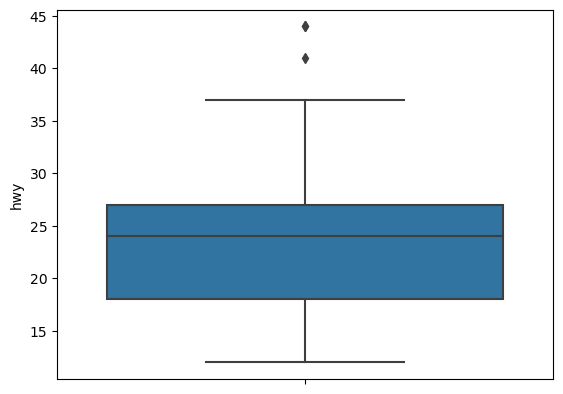

In [259]:
sns.boxplot(data = mpg, y = 'hwy') # data = mpg 값을 불러오고 y = hwy로 지정

In [260]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [261]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [262]:
iqr = pct75 - pct25 # IQR 구하기
iqr

9.0

In [263]:
pct25 - 1.5 * iqr # 하한 구하기

4.5

In [264]:
pct75 + 1.5 * iqr # 상한 구하기

40.5

In [265]:
# 극단치를 결측 처리하기 hwy 값이 4.5 ~ 40.5를 벗어나면 결측치 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                     np.nan, mpg['hwy'])

In [266]:
mpg['hwy'].isna().sum()

3

In [267]:
# 결측치를 제외하고 데이터 분석
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## Lab 7 : 혼자서 해보기

In [268]:
mpg = pd.read_csv('mpg.csv')

In [269]:
mpg.loc[[9,13,57,92], 'drv'] = 'k'

In [270]:
mpg.loc[[28,42,128,202], 'cty'] = [3,4,39,42]

In [271]:
mpg['drv'].value_counts()

f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [272]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)

In [273]:
mpg['drv'].isna().sum()

4

In [274]:
mpg['drv'].value_counts()

f    106
4    100
r     24
Name: drv, dtype: int64

<AxesSubplot:ylabel='cty'>

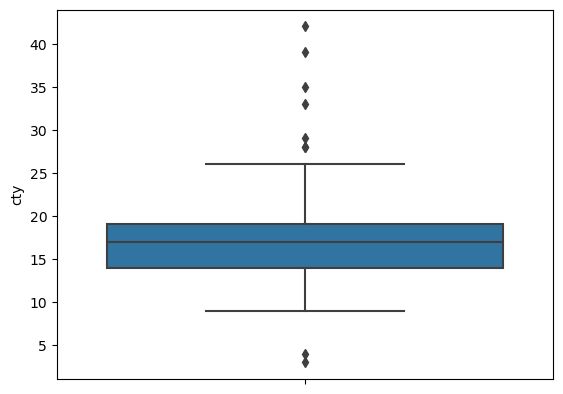

In [275]:
sns.boxplot(data = mpg, y = 'cty')

In [276]:
pct25 = mpg['cty'].quantile(0.25)
pct25

14.0

In [277]:
pct75 = mpg['cty'].quantile(0.75)
pct75

19.0

In [278]:
iqr = pct75 - pct25
iqr

5.0

In [279]:
pct25 - 1.5 * iqr

6.5

In [280]:
pct75 + 1.5 * iqr

26.5

In [281]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
                      np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

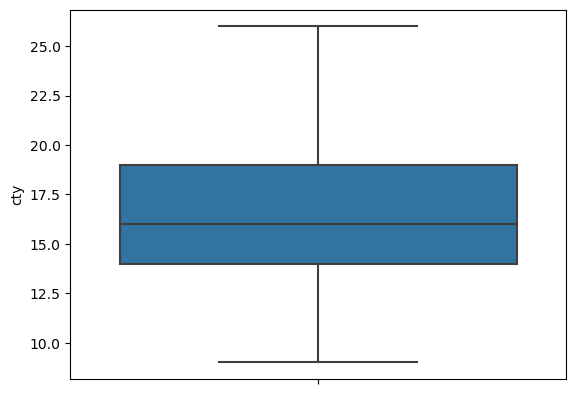

In [282]:
sns.boxplot(data = mpg, y = 'cty')

In [283]:
mpg.dropna(subset = ['drv','cty'])\
    .groupby('drv')\
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
